In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *
import math as mt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/atalia/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['expm1', 'seterr', 'log1p', 'errstate', 'exp2', 'geterr', 'beta', 'gamma', 'i0', 'cbrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
G = 4.302e-3 #pcSM(km/s)**2

In [3]:
# c= r_200/a donde 6<c<16 para el valor medio con forme el halo aunmenta de 3x10^11SM a 3x10^15SM
# r_200 es 200*rho_c donde rho_c = 3*H^2(t)/8piG
#parámetros
rho_0 = 1.
a = 1.
r = np.linspace(0.,100.,1000)

In [4]:
#Función para calcular la velocidad circular del perfil de densidad de Jaffe
def Vc_Jaffe(r, a, rho_0):
    f = 1./(1. + r/a)
    C = 4.*np.pi*G*rho_0*a**2.
    Vc = np.sqrt(C*f)
    return Vc

In [5]:
#Para graficar normalizando
C = 4.*np.pi*G*rho_0*a**2.
y = Vc_Jaffe(r, a, rho_0)/np.sqrt(C)
x = r/a

In [6]:
#Función para calcular la velocidad circular del perfil de densidad de Hernquist
def Vc_Hernquist(r, a, rho_0):
    f = (a*r)/(2.*(1. + r/a)**2.)
    C = 4.*np.pi*G*rho_0*a**2.
    Vc = np.sqrt(C*f)
    return Vc

In [7]:
y_1 = Vc_Hernquist(r, a, rho_0)/np.sqrt(C)

In [8]:
#Función para calcular la velocidad circular del perfil de densidad de NFW
def Vc_NFW(r, a, rho_0):
    f = 1./r*np.log(1. + r/a) - 1./(1. + r/a)
    C = 4.*np.pi*G*rho_0*a**2.
    Vc = np.sqrt(C*f)
    return Vc

In [9]:
y_2 = Vc_NFW(r, a, rho_0)/np.sqrt(C)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


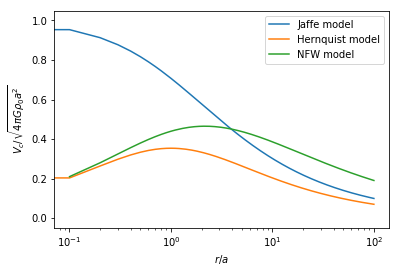

In [12]:
plt.plot(x,y,label='Jaffe model')
plt.plot(x,y_1, label='Hernquist model')
plt.plot(x,y_2, label='NFW model')
plt.xscale("log")
plt.xlabel(r'$r/a$')
plt.ylabel(r'$V_{c}/\sqrt{4\pi G\rho_{0}a^{2}}$')
plt.legend(loc='upper right', prop={'size':10})
#plt.xlim(0.,10.)
plt.savefig("Vc_J_H_NFW.png")
plt.show()

Perfil de densidad $\rho_{DM}(r) = \rho_{0} \frac{r}{r_{DM}}^{-\gamma_{DM}} (1 + (\frac{r}{r_{DM}})^{\alpha_{DM}})^{(\gamma_{DM} - \beta_{DM})/\alpha_{DM}}$

donde $M(r) = 4\pi \int_{0}^{r} \rho(r') r'^{2} dr'$

entonces $M(r) = 4\pi \int_{0}^{r} \rho_{0} (\frac{r'}{r_{DM}})^{-\gamma_{DM}} (1 + (\frac{r'}{r_{DM}})^{\alpha_{DM}})^{(\gamma_{DM} - \beta_{DM})/\alpha_{DM}} r'^{2} dr'$

$M(r) = 4\pi \rho_{0} \frac{r^{3}(\frac{r}{r_{DM}})^{\gamma} 2F_{1}(\frac{\beta - \gamma}{\alpha};\frac{\gamma + 3}{\alpha};\frac{\alpha + \gamma + 3}{\alpha};-\frac{r}{r_{DM}}^{\alpha})}{\gamma + 3}\mid_{0}^{r}$

donde $2F_{1} = \sum_{n=0}^{\infty} \frac{(\frac{\beta - \gamma}{\alpha})_{n} (\frac{\gamma + 3}{\alpha})_{n}}{(\frac{\alpha + \gamma + 3}{\alpha})_{n}}\frac{(-(\frac{r}{r_{DM}})^{\alpha})^{n}}{n!}$

así 

(1)$$\begin{equation} 
\frac{M(r)}{4\pi \rho_{0}} = \frac{r^{3}(\frac{r}{r_{DM}})^{\gamma} 2F_{1}(\frac{\beta - \gamma}{\alpha};\frac{\gamma + 3}{\alpha};\frac{\alpha + \gamma + 3}{\alpha};-\frac{r}{r_{DM}}^{\alpha})}{\gamma + 3}\mid_{0}^{r}
\end{equation}$$

In [ ]:
alpha = 1.
beta = 3.
gamma = 0.
r_DM = 1.#r_DM/kpc
rho_0 = 0.064

In [ ]:
r = np.linspace(0.,100.,1000)

In [ ]:
#Función para M(r)
#Nota al definir una función con parámetros fijos, primero poner indeterminados
def M_PW(r, alpha=1., beta=3., gamma=1., r_DM=1.):
    a = [(beta-gamma)/alpha]
    b = [(gamma +3.)/alpha]
    c = [(alpha + gamma + 3.)/alpha]
    z = -(r/r_DM)**alpha
    f = (r**3.)*(r/r_DM)**gamma/(gamma + 3.)
    K = 4.*np.pi*rho_0
    M = K*f*hyp2f1(a, b, c, z)
    return M

In [ ]:
plt.plot(r,np.log(M_PW(r, alpha=1., beta=3., gamma=1., r_DM=1.)))
plt.xlabel(r'$r$')
plt.ylabel(r'$logM(r)$')
plt.show()

Sabemos que $$\begin{equation}
V_{c} = \sqrt{\frac{GM(r)}{r}}\end{equation}$$

In [ ]:
def Vc(M,r):
    V_c = np.sqrt(G*M/r)
    return V_c

o bien $$\begin{equation} \frac{V_{c}}{\sqrt{G}} = \sqrt{\frac{M(r)}{r}}\end{equation}$$

donde estamos tomando $M(r)/4\pi \rho_{0}$ ecuación (1)

In [ ]:
def Vc_ad(M,r):
    V_c = np.sqrt(M/r)
    return V_c

In [ ]:
plt.plot(r,Vc(M_PW(r, alpha=1., beta=3., gamma=1., r_DM=1.),r))
plt.xlabel(r'$r$')
plt.ylabel(r'$Vc/\sqrt{4\pi G\rho_{0}}$')
plt.show()

In [ ]:
def Vc_PW(r):
    a = [(beta-gamma)/alpha]
    b = [(gamma +3.)/alpha]
    c = [(alpha + gamma + 3.)/alpha]
    z = -(r/r_DM)**alpha
    K = 4.*np.pi*rho_0
    f = (r**2.)*(r/r_DM)**gamma/(gamma + 3.)
    M = K*f*hyp2f1(a, b, c, z)
    V_c = np.sqrt(G*M)
    return V_c

In [ ]:
plt.plot(r,Vc_PW(r)/np.sqrt(4.*np.pi*G*rho_0))
plt.xlabel(r'$r$')
plt.ylabel(r'$Vc/\sqrt{4\pi G\rho_{0}}$')
plt.show()